In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot, lag_plot
import pandas
from scipy import stats
import os
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.ar_model import AR

/home/vgoncalves/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
filename = os.path.realpath(os.path.join(os.getcwd(), os.path.dirname('treinamento.txt'))) + '/treinamento-1.txt'

In [3]:
filename

'/home/vgoncalves/PycharmProjects/mixture_of_experts/treinamento-1.txt'

In [4]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

In [5]:
series = pandas.read_csv('/home/vgoncalves/PycharmProjects/mixture_of_experts/treinamento-1.txt',  header=None)

In [6]:
series.shape

(1000, 1)

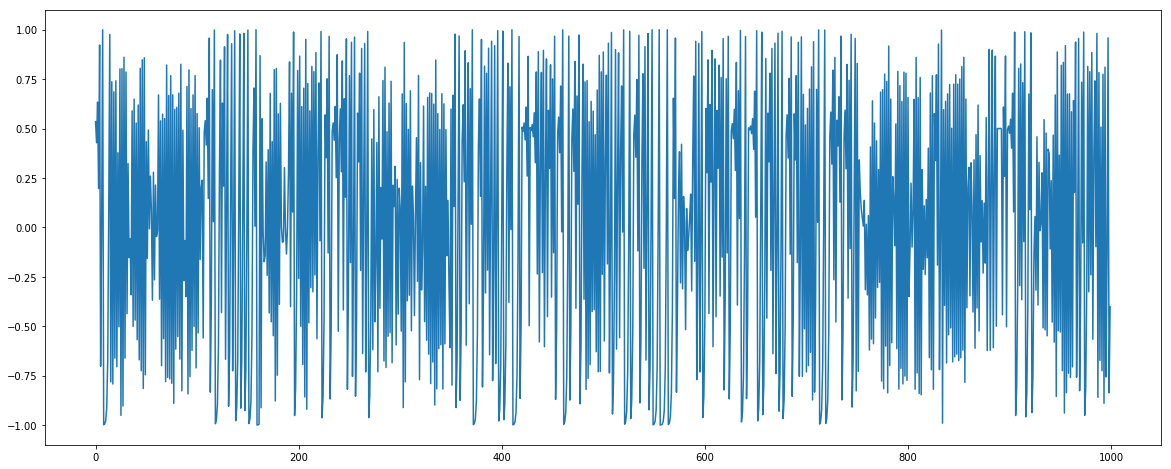

In [7]:
plt.plot(series)
plt.show()

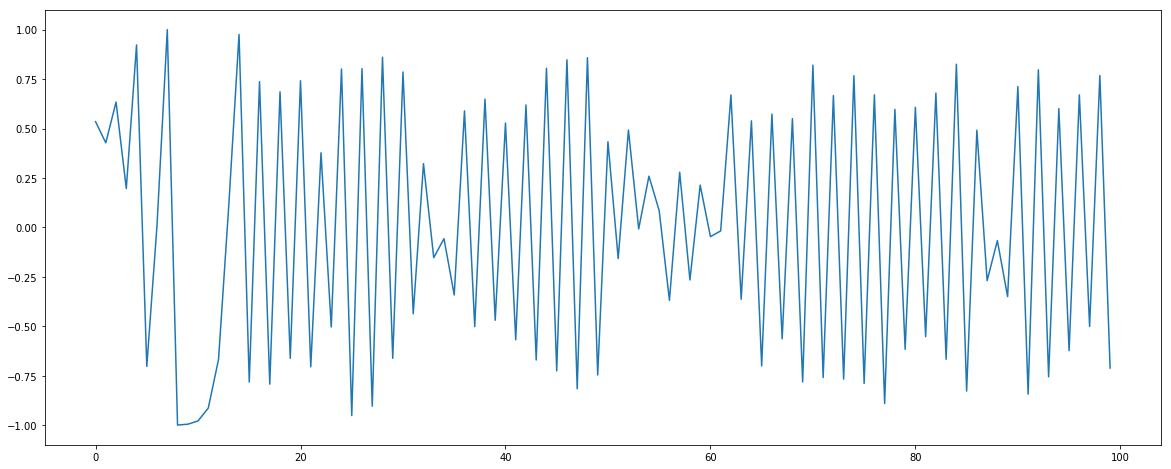

In [8]:
plt.plot(series[0:100])
plt.show()

In [9]:
from pandas._libs import lib, algos as libalgos

In [21]:
dataframe = pandas.concat([series.shift(24),series.shift(23),series.shift(22),series.shift(21),series.shift(20),series.shift(19),series.shift(18),series.shift(17),series.shift(16),series.shift(15),series.shift(14),series.shift(13),series.shift(12),series.shift(11),series.shift(10),series.shift(9),series.shift(8),series.shift(7),series.shift(6),series.shift(5),series.shift(4),series.shift(3),series.shift(2),series.shift(1), series], axis=1)
dataframe.columns = ['t-24','t-23','t-22','t-21','t-20','t-19','t-18','t-17','t-16','t-15','t-14','t-13','t-12','t-11','t-10','t-9','t-8','t-7','t-6','t-5','t-4','t-3','t-2','t-1', 't']
result = dataframe.corr()
print(result)

          t-24      t-23      t-22      t-21      t-20      t-19      t-18  \
t-24  1.000000 -0.332721  0.297888 -0.278046  0.249080 -0.205944  0.230651   
t-23 -0.332721  1.000000 -0.333061  0.298087 -0.278427  0.249241 -0.206425   
t-22  0.297888 -0.333061  1.000000 -0.333435  0.299106 -0.278703  0.250468   
t-21 -0.278046  0.298087 -0.333435  1.000000 -0.333803  0.299264 -0.279148   
t-20  0.249080 -0.278427  0.299106 -0.333803  1.000000 -0.334034  0.300366   
t-19 -0.205944  0.249241 -0.278703  0.299264 -0.334034  1.000000 -0.334265   
t-18  0.230651 -0.206425  0.250468 -0.279148  0.300366 -0.334265  1.000000   
t-17 -0.178131  0.231000 -0.207312  0.250832 -0.279925  0.300597 -0.335056   
t-16  0.209234 -0.178352  0.231432 -0.207539  0.251236 -0.280079  0.300979   
t-15 -0.148272  0.208499 -0.176745  0.230641 -0.205951  0.250596 -0.278181   
t-14  0.119842 -0.148148  0.208101 -0.176607  0.230245 -0.205848  0.250109   
t-13 -0.188914  0.118923 -0.146051  0.207020 -0.174537  0.229352

In [15]:
dataframe

,t-24,t-23,t-22,t-21,t-20,t-19,t-18,t-17,t-16,t-15,...,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.534824
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.534824,0.427926
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.534824,0.427926,0.633759
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.534824,0.427926,0.633759,0.196700
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.534824,0.427926,0.633759,0.196700,0.922618
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.534824,0.427926,0.633759,0.196700,0.922618,-0.702448
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.534824,0.427926,0.633759,0.196700,0.922618,-0.702448,0.013135
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.534824,0.427926,0.633759,0.196700,0.922618,-0.702448,0.013135,0.999655
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.534824,0.427926,0.633759,0.196700,0.922618,-0.702448,0.013135,0.999655,-0.998620
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.534824,0.427926,0.633759,0.196700,0.922618,-0.702448,0.013135,0.999655,-0.998620,-0.994484


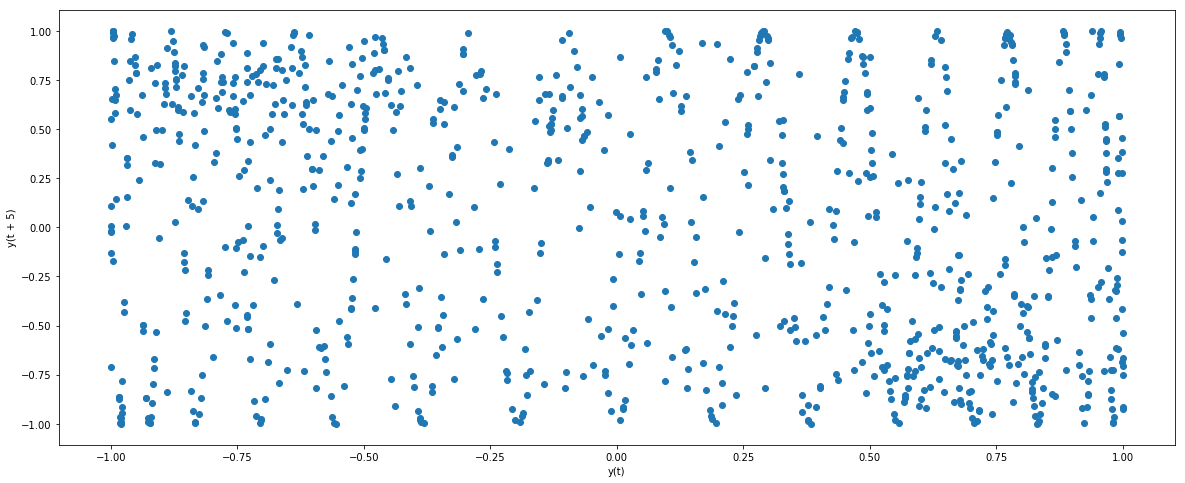

In [22]:
lag_plot(series,lag=5)
plt.show()

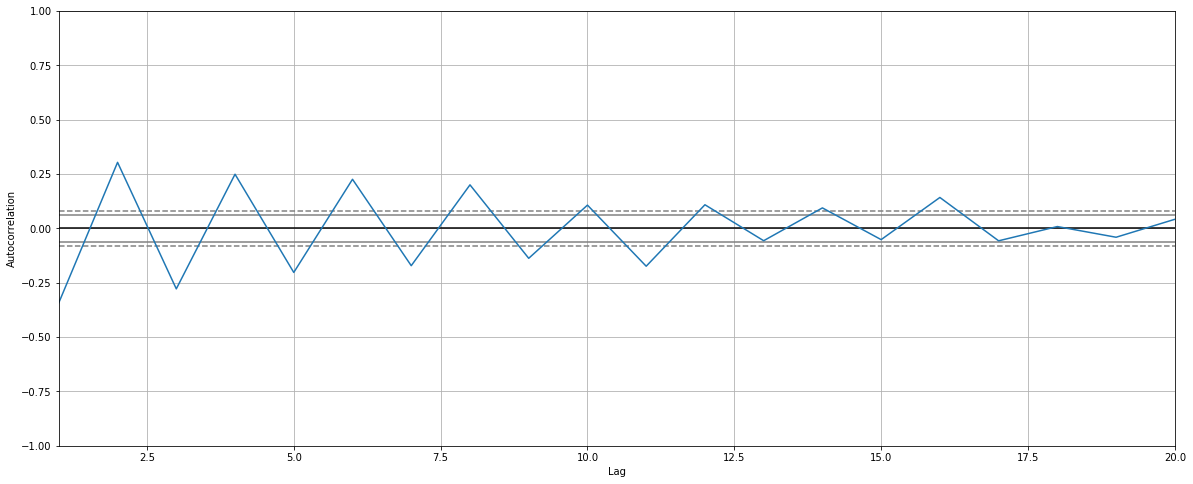

In [11]:
autocorrelation_plot(series)
plt.xlim(1, 20)
plt.show()

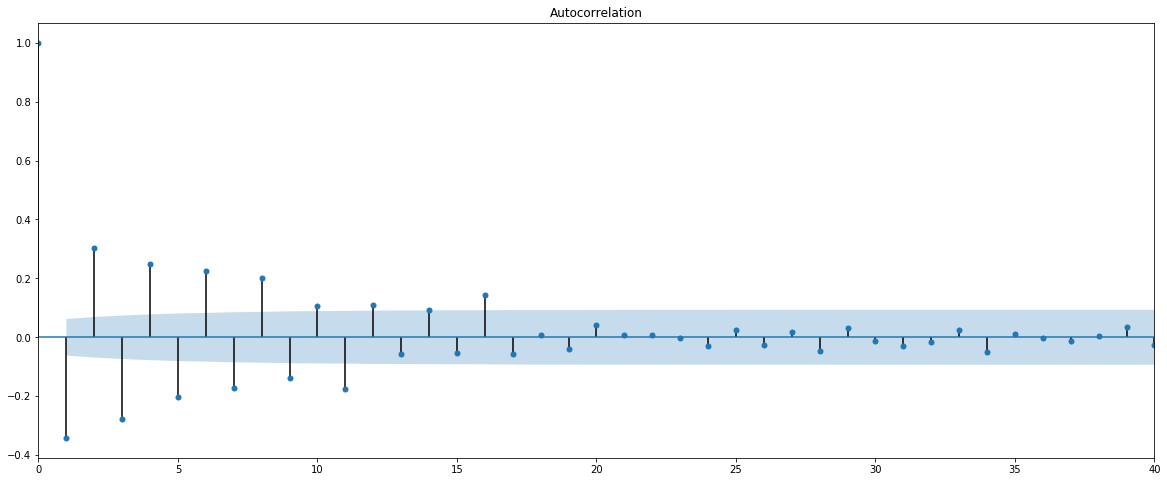

In [12]:
plot_acf(series, lags=200)
plt.xlim(0, 40)
plt.show()

In [13]:
model = AR(series.values)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)

Lag: 21
